In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalisation
x_train = x_train / 255.0
x_test = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalisation
x_train = x_train / 255.0
x_test = x_test / 255.0


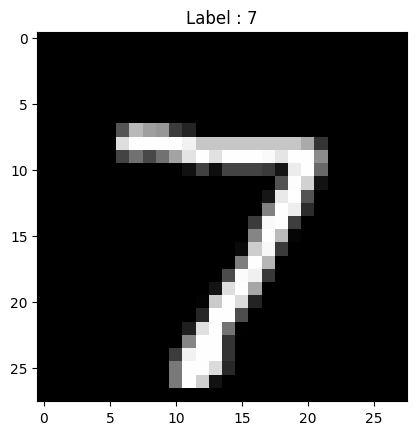

In [4]:
def afficher(i):
    plt.title(f"Label : {y_test[i]}")
    plt.imshow(x_test[i], cmap="gray")
    plt.show()

afficher(0)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),      # passe de 28x28 → 784
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')     # sortie 10 classes
])


C:\Users\marca\OneDrive\Área de Trabalho\Data Science\Data Science pour la pratique\jupy\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9329 - loss: 0.2304
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9700 - loss: 0.0969
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9782 - loss: 0.0683
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9844 - loss: 0.0496
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9869 - loss: 0.0404


In [7]:
loss, acc = model.evaluate(x_test, y_test)
print("Accuracy:", acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9815 - loss: 0.0663
Accuracy: 0.9815000295639038


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Label réel : 5
Prediction     : 2


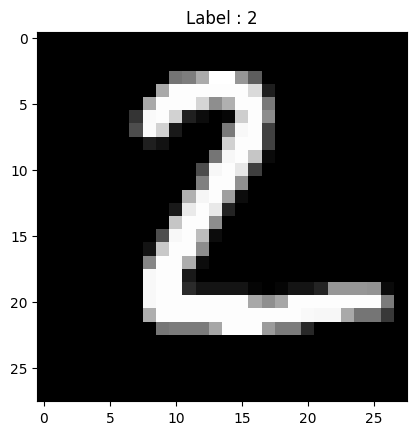

In [8]:
predictions = model.predict(x_test)

print("Label réel :", y_test[8])
print("Prediction     :", np.argmax(predictions[1]))

afficher(1)


In [9]:
model.save("digit_model.h5")

# Recharger
new_model = tf.keras.models.load_model("digit_model.h5")
